# Welcome to digit recognition 

In this project, I'm gonna analyze a dataset of number recognition, in order to build a model capable of identifying a number with an image as an output. <br>
The first thing we are going to do is import all the necessary things for this project including the dataset and all the Python libraries to use.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset is provided by a library in python called **sckit learn**, which is a Python library dedicated to machine learning. We are gonna use the digits dataset. 

In [20]:
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline

Next step is to load the Dataset , and scale the samples down so we can better understand it. Im gonna save the targets or the result of each sample in the variable **y** and the count of samples and features with the method shape of the data.

In [5]:
digits = load_digits()
data = scale(digits.data)
y = digits.target
samples, features = data.shape
labels = np.unique(y).size

I'm gonna create a function that is going to compute the score of the results of the model

In [41]:
from time import time
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    fit_time = time() - t0
    print(f"""
              name: {name}
              time: {fit_time}
              inertia: {estimator.inertia_:.3f} 
              Homogeneity score: { metrics.homogeneity_score(y, estimator.labels_):.3f}
              Completness score: {metrics.completeness_score(y, estimator.labels_):.3f} 
              V measure score: {metrics.v_measure_score(y, estimator.labels_):.3f}
              Adjusted rand score: {metrics.adjusted_rand_score(y, estimator.labels_):.3f}
              Adjusted mutual information based score: {metrics.adjusted_mutual_info_score(y, estimator.labels_):.3f}
              Silhouette score: {metrics.silhouette_score(data, estimator.labels_, metric ='euclidean', sample_size= 300):.3f} 
              """)

In [48]:
estimator = KMeans(init ='k-means++', n_clusters =labels, n_init =10)
bench_k_means(estimator, name = 'k-means++', data=data)


              name: k-means++
              time: 0.7189590930938721
              inertia: 69519.937 
              Homogeneity score: 0.611
              Completness score: 0.659 
              V measure score: 0.634
              Adjusted rand score: 0.480
              Adjusted rand score: 0.630
              Silhouette score: 0.135 
              


Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular, any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering defines separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.

<ul>
    <li>Homogeneity: each cluster contains only members of a single class.</li>
    <li>Completeness: all members of a given class are assigned to the same cluster.</li>
    <li>V-measure is the harmonic mean of Homogeneity and completness</li>
    <li>The adjusted Rand index corrects for chance and will give such a baseline.</li>
    <li>The Silhouette Coefficient is used when the ground truth labels are no known, the evaluation must be performed using the model itself. </li>
</ul>


In [77]:
np.unique(estimator.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [105]:
estimator.predict(data[19].reshape(1,64))

array([4], dtype=int32)

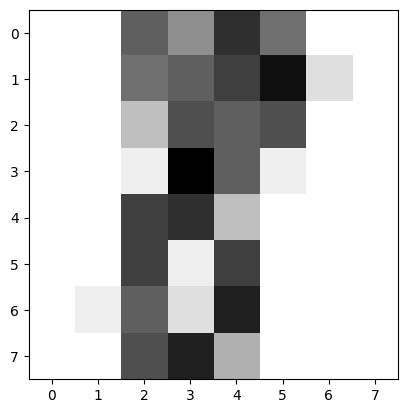

In [104]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[18], cmap = 'binary')